# Galaxies and their Mass
## Assignment 4
### by Nathanael J. Reynolds
### ID: 999643303


### 1 Rotation Curves
#### a.) Plot A best represents the speed of points on a merry-go-round. This is shown by the simple equation relating linear velocity to angular velocity: $v=r\omega$. This equation shows that $v \propto r$, therefore the linear plot best represents the speed of points on the merry-go-round. For the speed of the planets in the solar system C is the curve that best fits. This is shown by an equation that can be obtained throught Kepler's Third Law $v = \sqrt {\frac {GM}{r}}$ which shows that $v \propto \frac {1}{\sqrt {r}}$
#### b.) As stated in part a, velocity (rotation speed) in the solar system is inversely proportional to radius
#### c.) This does not agree with the rotation curve of our galaxy

### 2 Rotation Curves: Data 


In [3]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


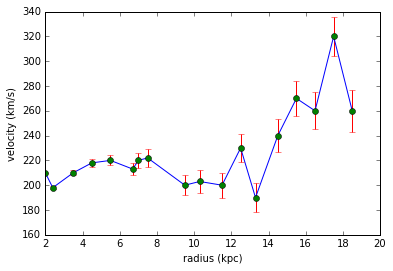

In [4]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from astropy import units as units
from astropy import constants as constants
import math

%matplotlib inline

G =  6.67384e-11

#Mass of the sun
M_Solar = 1.989e30 #* units.kg

#Mass and scale radius of galatic bulge
M_Bulge = 1.3e10 * M_Solar
a_Bulge = 0.4 #* units.kpc

#Mass and scale radius of galactic disk
M_Disk = 6.5e10 * M_Solar
a_Disk = 4.0 #* units.kpc

#Mass and scale radius of galactic halo
M_Halo = 10**9 * M_Solar
a_Halo = 0.5 #* units.kpc

p_crit = 2.3
Sc = 0.3
rs = 230 * 3.086e19



#An array containing the velocity data that was given.
#Radius units are in kpc. Velocity column's units are in km/s
radius = [2.0, 2.4 ,3.5, 4.5, 5.5, 6.7, 7.0, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
velocity = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]

error = range(len(velocity))



plt.plot(radius, velocity)
#plt.axis([0, 20, 0, 350])
plt.xlabel('radius (kpc)')
plt.ylabel('velocity (km/s)')
plt.errorbar(radius, velocity, yerr=error, fmt='o', ecolor='r', label='velocity')
plt.show()




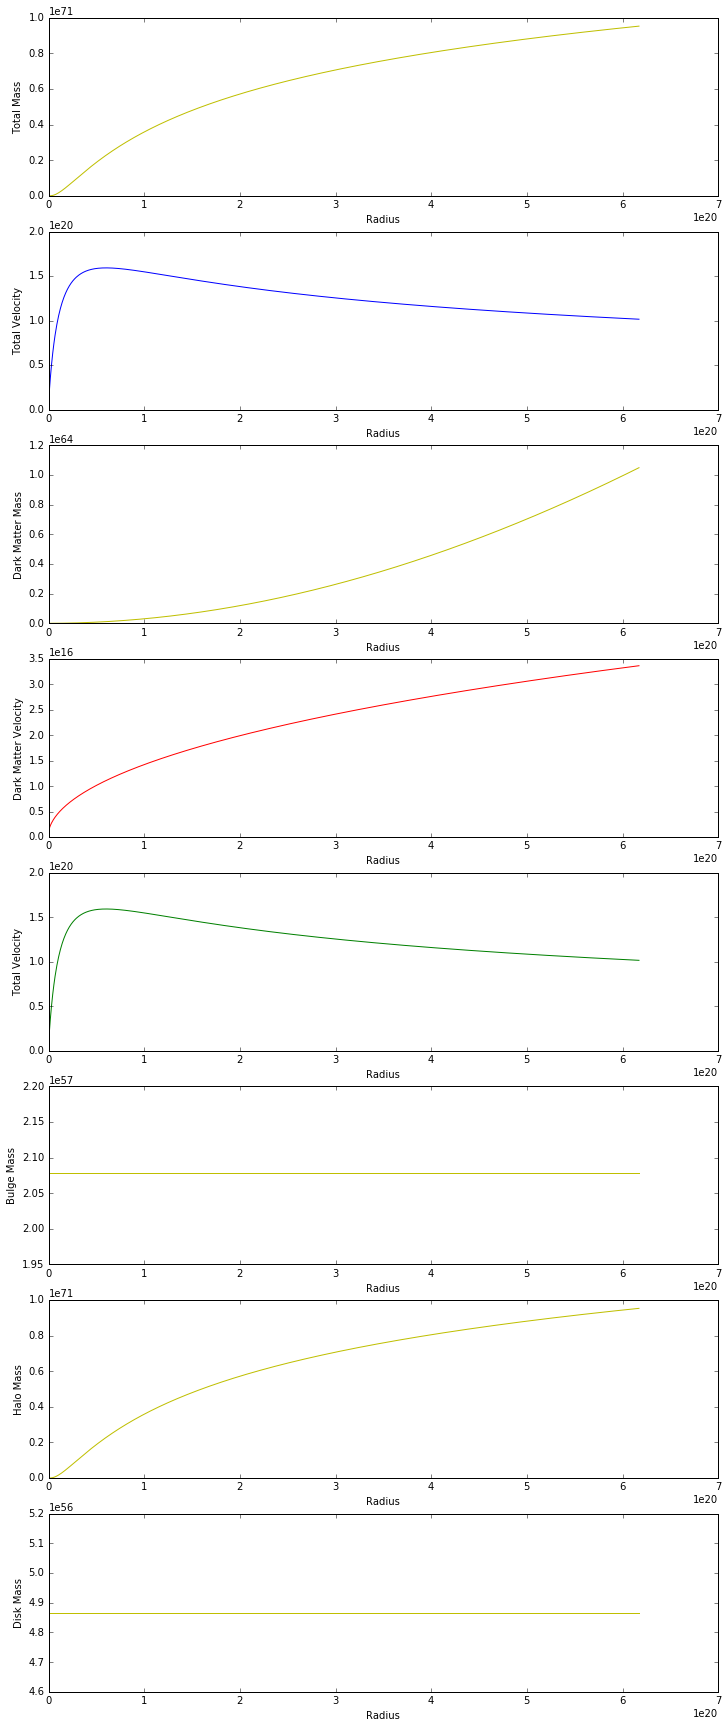

In [7]:
#Function for rotation curve of the bulge
def rho_bulge(r):
    rho = M_Bulge / (4 * np.pi * a_Bulge**3) * (1 + (r / a_Bulge)**2)**(-5/2)
    dm_dr1 = 4.0 * np.pi * r**2 * rho
    return dm_dr1

#Function for rotation curve of the halo
def rho_halo(r):
    rho = (M_Halo*((a_Halo + (r/3.086E19)))**(-3.1))*(M_Solar/((3.086E19)**3))
    dm_dr2 = 4.0 * np.pi * r**2 * rho
    return dm_dr2

#Function for rotation curve of th disk
def sigma_disk(r):
    sigma = M_Disk / (2 * np.pi * a_Disk**2) * np.e**(-r / a_Disk)
    dm_dr3 = 2.0 * np.pi * r * sigma
    return dm_dr3

#Dark matter function
def DarkMatter(r):
    rho = (p_crit*Sc)/((r/rs)*(1+(r/rs))**2)
    dm_dr4 = 4 * np.pi * r**2 * rho
    return dm_dr4

#velocity function
def velocity(L, r):                                                 
        
    v=np.sqrt((6.67E-11)*L/r)
    
    return v

# Creating values of radius
start = 0.1                                                         
end = 20.0*3.086E19
samples = 1000

dr = end/samples

r=np.linspace(start, end, samples)                                  



# Creating an arrays for mass enclosed
m_bulge=[dr*rho_bulge(r[x]) for x in range(samples)]                 

m_halo=[dr*rho_halo(r[x]) for x in range(samples)]

m_disk=[(dr*sigma_disk(r[x])) for x in range(samples)]

m_tot=[dr*(rho_halo(r[x])+rho_bulge(r[x])+sigma_disk(r[x])) for x in range(samples)]

DM=[(dr*DarkMatter(r[x])) for x in range(samples)]

total_mass=[dr*(rho_halo(r[x])+rho_bulge(r[x])+sigma_disk(r[x]) + DarkMatter(r[x])) for x in range(samples)]


# Computing mass enclosed and storing values in array
for i in range(samples):                                           
    if i == 0:
        m_bulge[i] = m_bulge[i]
    else:
        m_bulge[i] += m_bulge[(i-1)]

for i in range(samples):
    if i == 0:
        m_halo[i] = m_halo[i]
    else:
        m_halo[i] += m_halo[(i-1)]
        
for i in range(samples):                                           
    if i == 0:
        m_disk[i] = m_disk[i]
    else:
        m_disk[i] += m_disk[(i-1)]        
        
for i in range(samples):
    if i == 0:
        m_tot[i] = m_tot[i]
    else:
        m_tot[i] += m_tot[(i-1)]
        
for i in range(samples):                                            
    if i == 0:
        DM[i] = DM[i]
    else:
        DM[i] += DM[(i-1)]        
 
# Computing mass enclosed and storing values in array
for i in range(samples):                                              
    if i == 0:
        total_mass[i] = total_mass[i]
    else:
        total_mass[i] += total_mass[(i-1)]
        
                
        
# Computing total velocity (no Dark Matter)        
v_tot=[velocity(m_tot[x],r[x]) for x in range(samples)]               

#Dark Matter velocity
DM_velocity=[velocity(DM[x], r[x]) for x in range(samples)]           


total_velocity=[velocity(total_mass[x], r[x]) for x in range(samples)]

# Plotting Rotation Curves
fig= plt.figure(1, figsize=(12,30))                                   

ax1 = fig.add_subplot(816)                                            
ax1.plot(r, m_bulge, 'y')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Bulge Mass')

ax1 = fig.add_subplot(817)                                            
ax1.plot(r, m_halo, 'y')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Halo Mass')

ax1 = fig.add_subplot(818)                                            
ax1.plot(r, m_disk, 'y')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Disk Mass')

#total mass versus radius
ax1 = fig.add_subplot(811)                                            
ax1.plot(r, m_tot, 'y')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Mass')

#Total velocity versus radius
ax1 = fig.add_subplot(812)                                            
ax1.plot(r, v_tot)
ax1.set_ylim(0, 2e20)
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Velocity')

#Dark Matter mass versus radius
ax1 = fig.add_subplot(813)                                             
ax1.plot(r, DM, 'y')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Dark Matter Mass')

#Dark Matter velocity versus radius
ax1 = fig.add_subplot(814)                                             
ax1.plot(r, DM_velocity, 'r')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Dark Matter Velocity')

#mass total plus Dark Matter velocity versus radius
ax1 = fig.add_subplot(815)                                             
ax1.plot(r, total_velocity, 'g')
ax1.set_ylim(0, 2e20)
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Velocity')





#### c.) I don't think the curves fit the data very well, they look very different. I did add dark matter to the final curve though

#### d.) Perhaps the Plumber Sphere isn't the best model and a different exponent could yield a different result but I don't know what that exponent would be